# Les packages nécessaires

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [80]:
CDM_data=pd.read_csv("new_Base_CDM.csv",sep=";",header=1)
CDM_data_balanced=pd.read_csv("new_Base_CDM_balanced_V2.csv",sep=";",header=1)

In [81]:
CDM_data.head()

Display  cor_sales_in_vol  cor_sales_in_val  turnover  value  ENSEIGNE  \
0  No_Displ              11.0             35.21     19622      8  MONOPRIX   
1  No_Displ               3.0             13.32     19622     12  MONOPRIX   
2  No_Displ               6.0              8.10     19622      5  MONOPRIX   
3  No_Displ              13.0             19.35     19622      8  MONOPRIX   
4  No_Displ              13.0             90.09     19622     28  MONOPRIX   

   VenteConv  Feature  
0       88.0  No_Feat  
1       36.0  No_Feat  
2       30.0  No_Feat  
3      104.0  No_Feat  
4      364.0     Feat

In [82]:
CDM_data.shape

(200737, 8)

In [83]:
CDM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200737 entries, 0 to 200736
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Display           200737 non-null  object 
 1   cor_sales_in_vol  200737 non-null  float64
 2   cor_sales_in_val  200737 non-null  float64
 3   turnover          200737 non-null  int64  
 4   value             200737 non-null  int64  
 5   ENSEIGNE          200737 non-null  object 
 6   VenteConv         200737 non-null  float64
 7   Feature           200737 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.3+ MB


In [84]:
plt.rcParams.update({'font.size':16})

<AxesSubplot:title={'center':'Distribution of magazine by Display'}, xlabel='Display'>

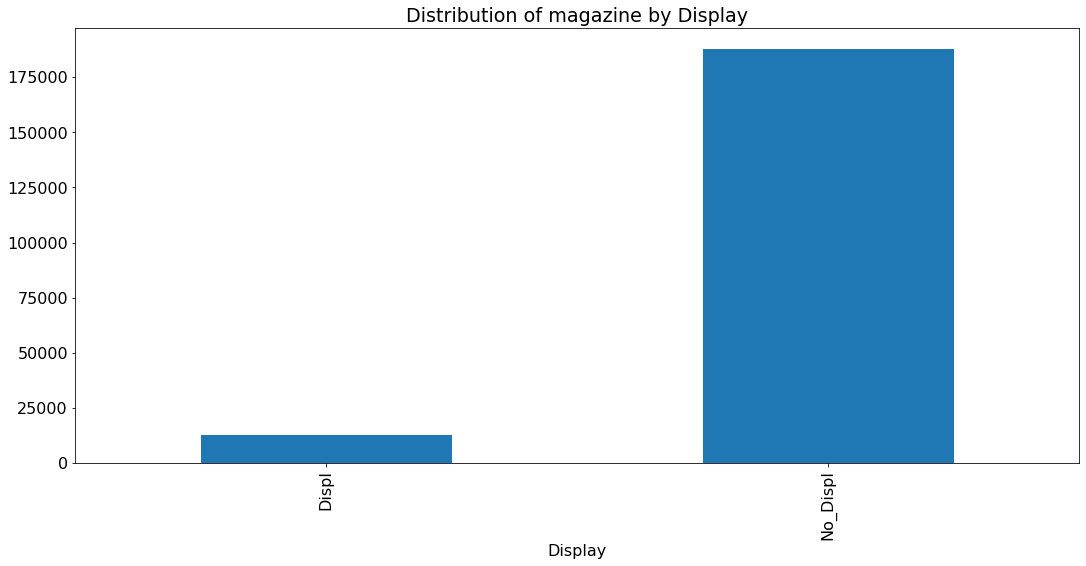

In [85]:
CDM_data.groupby("Display").count()["Feature"].plot(kind="bar",figsize=(18,8),title="Distribution of magazine by Display")

<AxesSubplot:title={'center':'Distribution by type of Enseigne'}, xlabel='ENSEIGNE'>

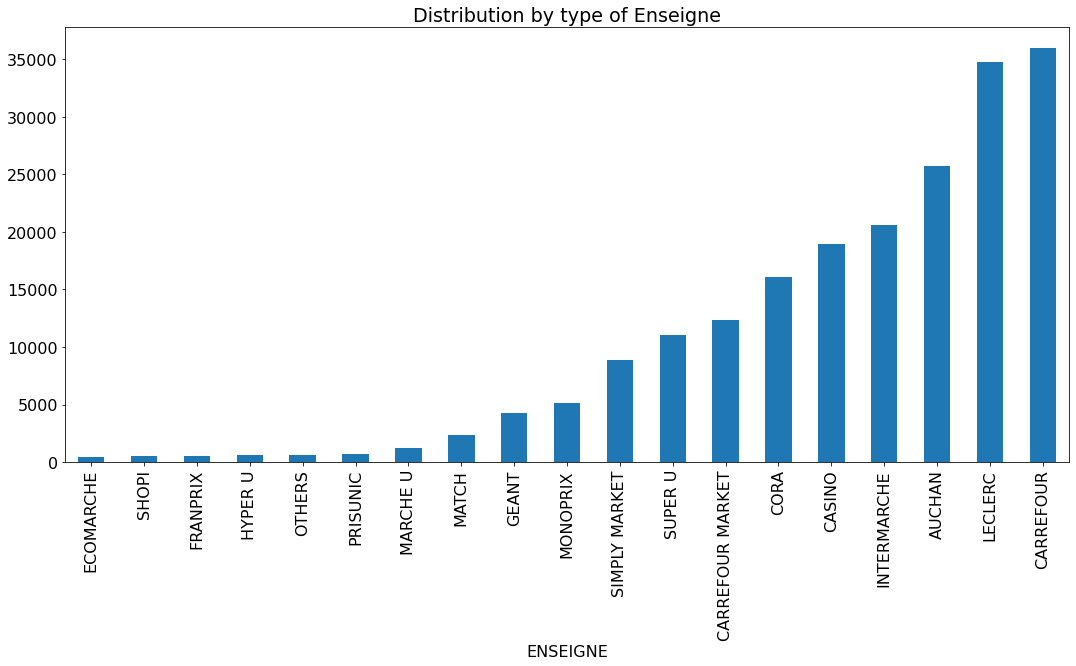

In [86]:
CDM_data.groupby("ENSEIGNE").count()["Display"].sort_values().plot(kind="bar",figsize=(18,8),title="Distribution by type of Enseigne")

<AxesSubplot:title={'center':'Distribution by feature'}, xlabel='Feature'>

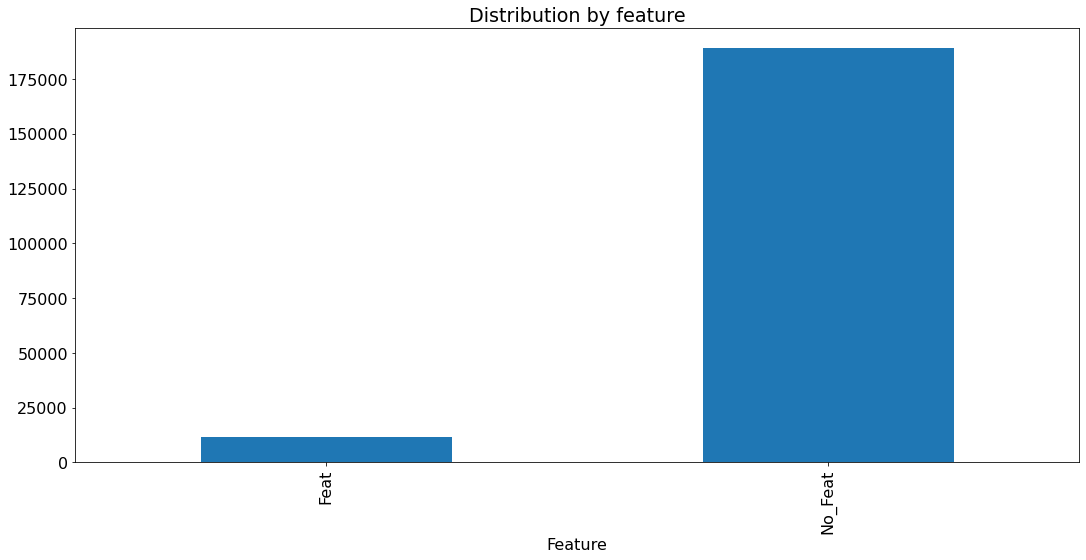

In [87]:
CDM_data.groupby("Feature").count()["Display"].plot(kind="bar",figsize=(18,8),title="Distribution by feature")

<AxesSubplot:ylabel='Frequency'>

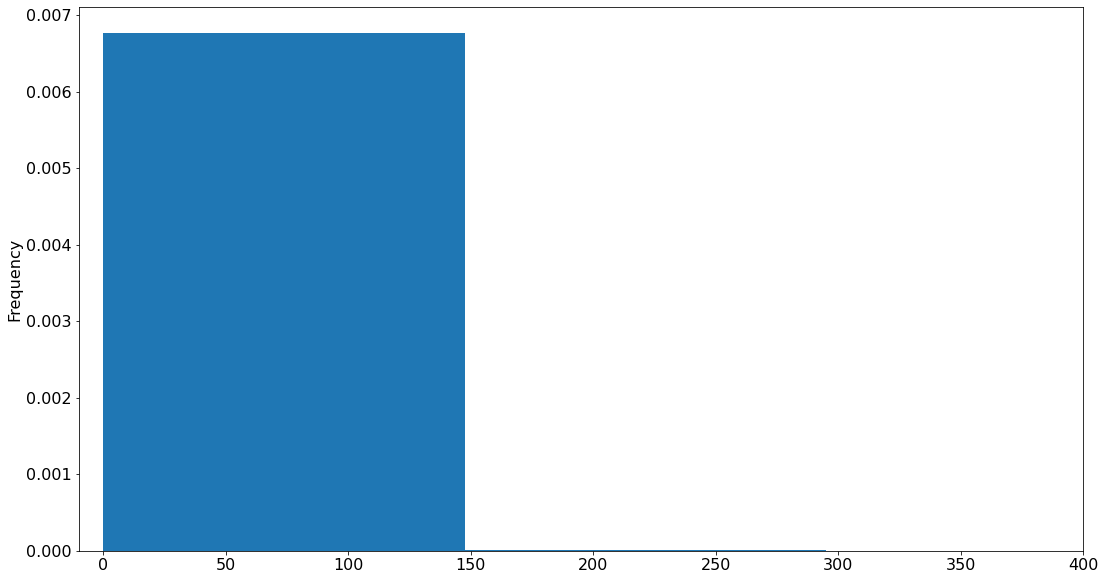

In [88]:
CDM_data['cor_sales_in_vol'].plot(kind="hist",figsize=(18,10),density=True,xlim=[-10,400])
#plt.axes(xlim=[0,1000])

<AxesSubplot:ylabel='Frequency'>

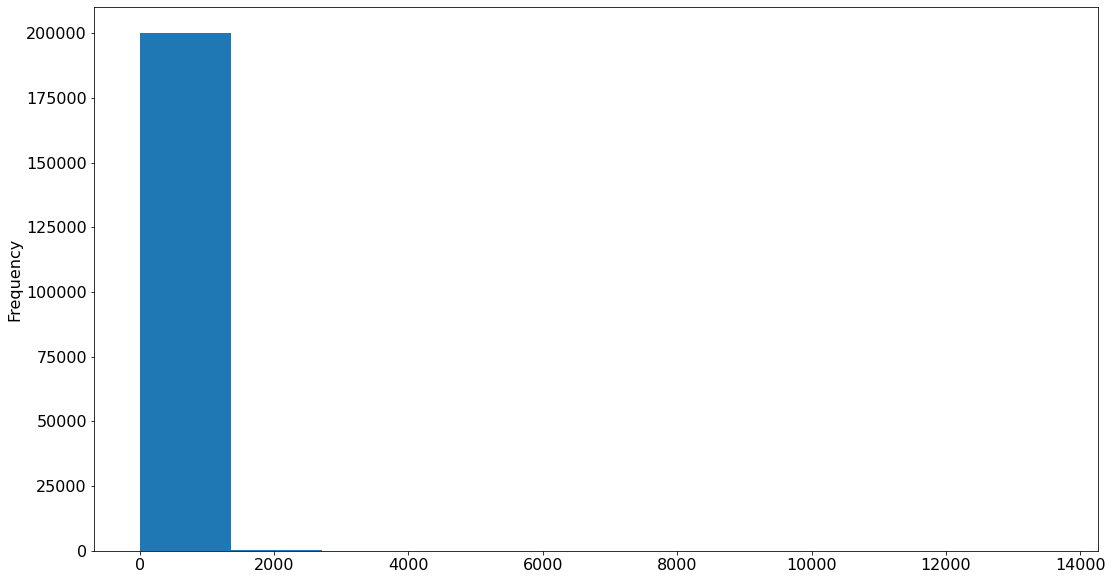

In [89]:
CDM_data['cor_sales_in_val'].plot(kind="hist",figsize=(18,10))

<AxesSubplot:title={'center':'Distribution of turnover'}, ylabel='Frequency'>

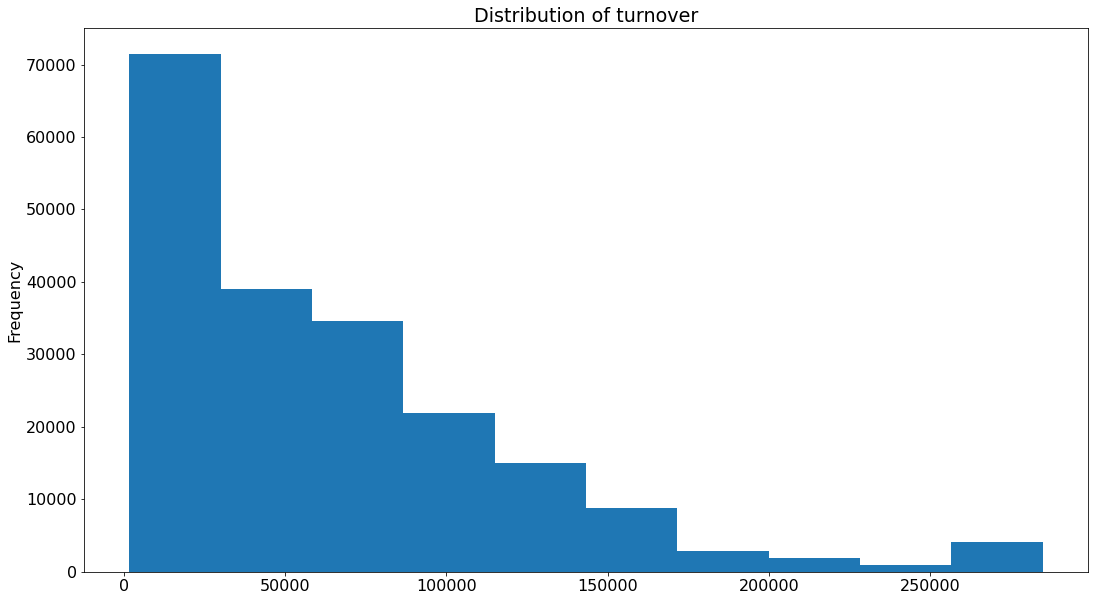

In [90]:
CDM_data['turnover'].plot(kind="hist",figsize=(18,10),title="Distribution of turnover")

<AxesSubplot:title={'center':'Distribution of value'}>

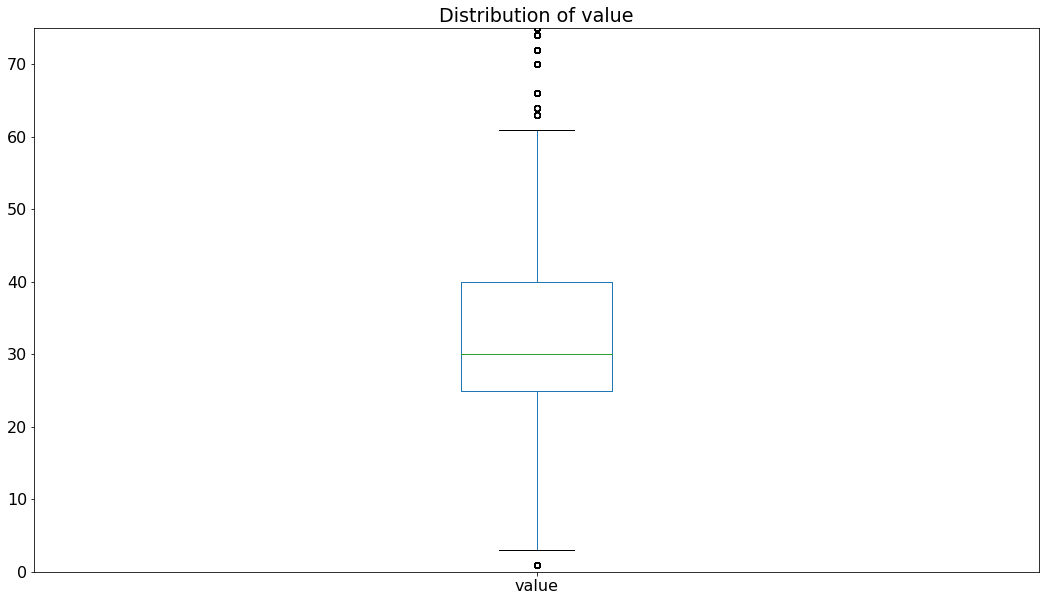

In [132]:
CDM_data['value'].plot(kind="box",figsize=(18,10),title="Distribution of value",ylim=[0,75])

<AxesSubplot:title={'center':'Distribution of VenteConv'}, ylabel='Frequency'>

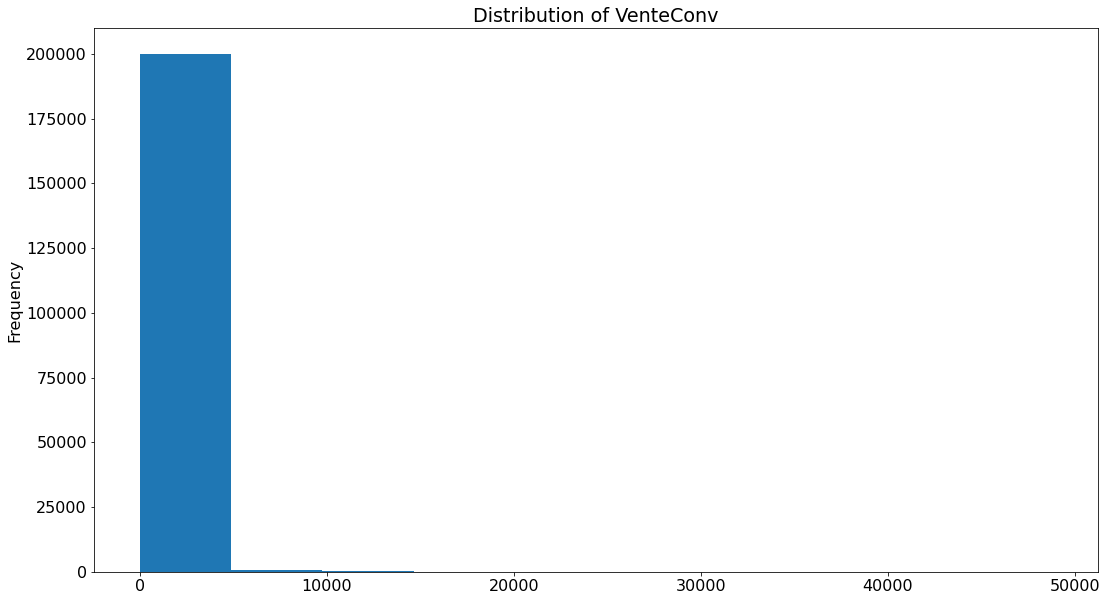

In [129]:
CDM_data["VenteConv"].plot(kind="hist",figsize=(18,10),title="Distribution of VenteConv")

<AxesSubplot:>

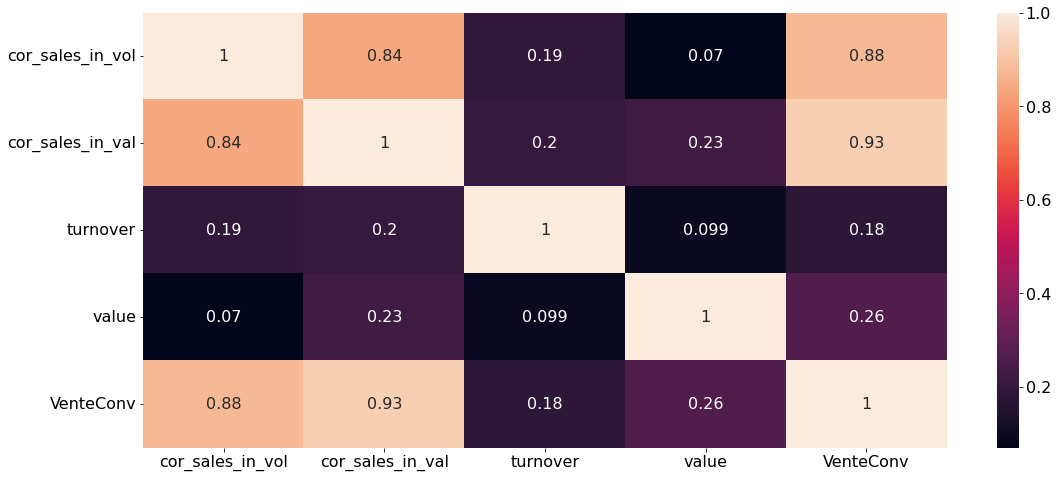

In [93]:
corr=CDM_data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr,annot=True)

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
cate_col=['Display','ENSEIGNE','Feature']

In [96]:
labelencoder=LabelEncoder()
for col in cate_col:
    CDM_data[col]=labelencoder.fit_transform(CDM_data[col])

# Pour balanced data

labelencoder=LabelEncoder()
for col in cate_col:
    CDM_data_balanced[col]=labelencoder.fit_transform(CDM_data_balanced[col])

In [97]:
CDM_data.head()

Display  cor_sales_in_vol  cor_sales_in_val  turnover  value  ENSEIGNE  \
0        1              11.0             35.21     19622      8        13   
1        1               3.0             13.32     19622     12        13   
2        1               6.0              8.10     19622      5        13   
3        1              13.0             19.35     19622      8        13   
4        1              13.0             90.09     19622     28        13   

   VenteConv  Feature  
0       88.0        1  
1       36.0        1  
2       30.0        1  
3      104.0        1  
4      364.0        0

<AxesSubplot:>

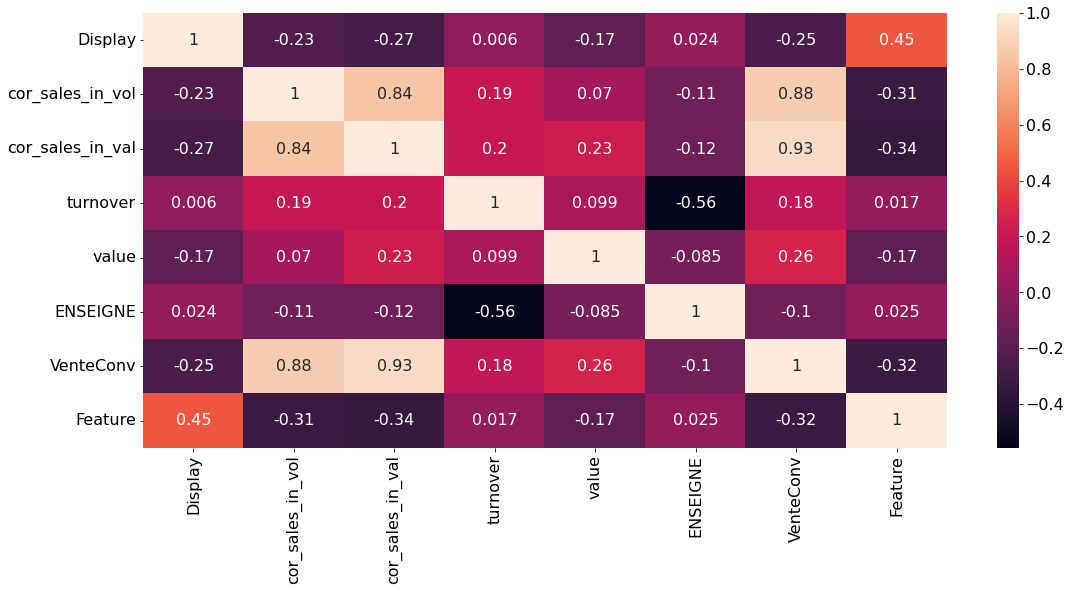

In [98]:
new_corr=CDM_data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(new_corr,annot=True)

# Modelisation

In [99]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,auc
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

## Division des données

In [100]:
X=CDM_data.iloc[:,1:]
y=CDM_data['Display']

#Pour balanced

X_b=CDM_data_balanced.iloc[:,1:]
y_b=CDM_data_balanced['Display']

In [101]:
X_t,X_valid,y_t,y_valid=train_test_split(X,y,train_size=0.85)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,train_size=0.8)

#Pour balanced
X_t_b,X_valid_b,y_t_b,y_valid_b=train_test_split(X_b,y_b,train_size=0.85)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_t_b,y_t_b,train_size=0.8)

<AxesSubplot:>

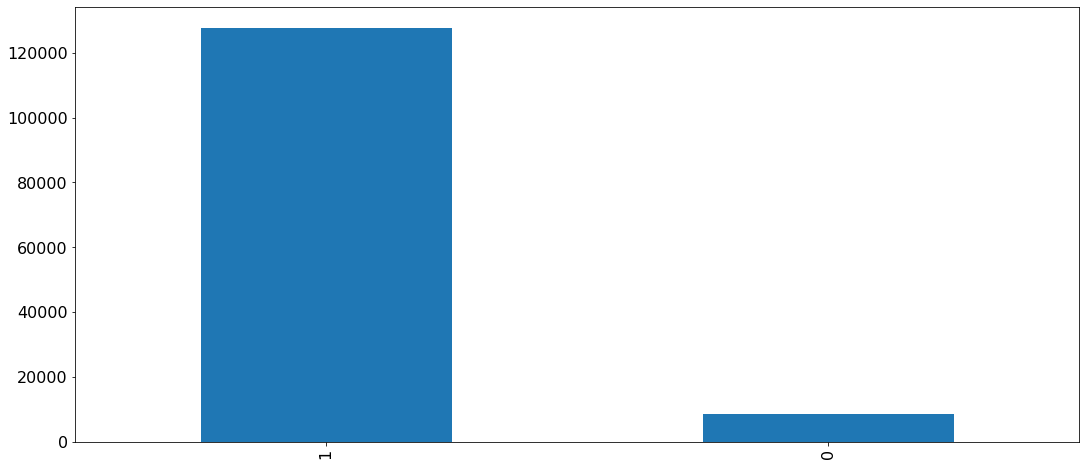

In [102]:
y_train.value_counts().plot(kind="bar",figsize=(18,8))

<AxesSubplot:>

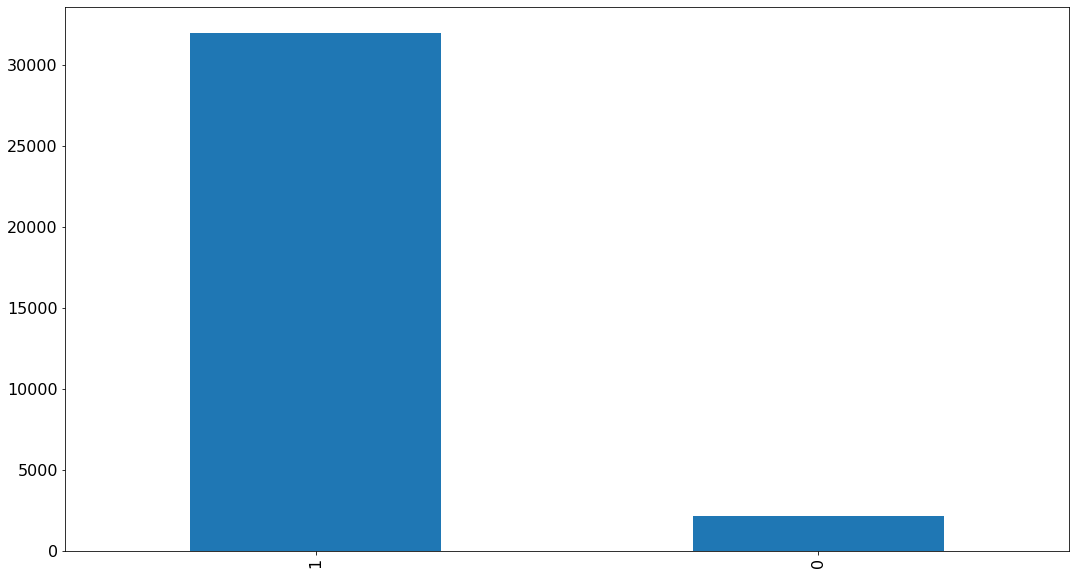

In [103]:
y_test.value_counts().plot(kind="bar",figsize=(18,10))

Nous voyons une sous répresentation de la classe contenant le caractère `Display`

## - RandomForestClassifier

In [161]:
randomforest_unb=RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 6, n_estimators= 200).fit(X_train,y_train)
randomforest_b=RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 6, n_estimators= 200).fit(X_train_b,y_train_b)

In [162]:
print("Score d'adjustement de unbalanced data model:", randomforest_unb.score(X_train,y_train))
print("Score d'adjustement de balanced data model:", randomforest_b.score(X_train_b,y_train_b))

Score d'adjustement de unbalanced data model: 0.963032967032967
Score d'adjustement de balanced data model: 0.8523757914551366


### Predictions on unbalanced and balanced data with models training on different datasets

In [163]:
y_predict_forest_unb=randomforest_unb.predict(X_test)
y_predict_forest_b=randomforest_b.predict(X_test)

### Detection of influence of unbalanced data on model vs balanced data

In [164]:
print("=="*10+"For unbalanced data"+"=="*10)
print(classification_report(y_test,y_predict_forest_unb))
print("=="*10+"For balanced data"+"=="*10)
print(classification_report(y_test,y_predict_forest_b))

====================For unbalanced data====================
              precision    recall  f1-score   support

           0       0.69      0.38      0.49      2219
           1       0.96      0.99      0.97     31907

    accuracy                           0.95     34126
   macro avg       0.83      0.68      0.73     34126
weighted avg       0.94      0.95      0.94     34126

====================For balanced data====================
              precision    recall  f1-score   support

           0       0.34      0.75      0.47      2219
           1       0.98      0.90      0.94     31907

    accuracy                           0.89     34126
   macro avg       0.66      0.83      0.70     34126
weighted avg       0.94      0.89      0.91     34126



<AxesSubplot:title={'center':'For unbalanced data model'}>

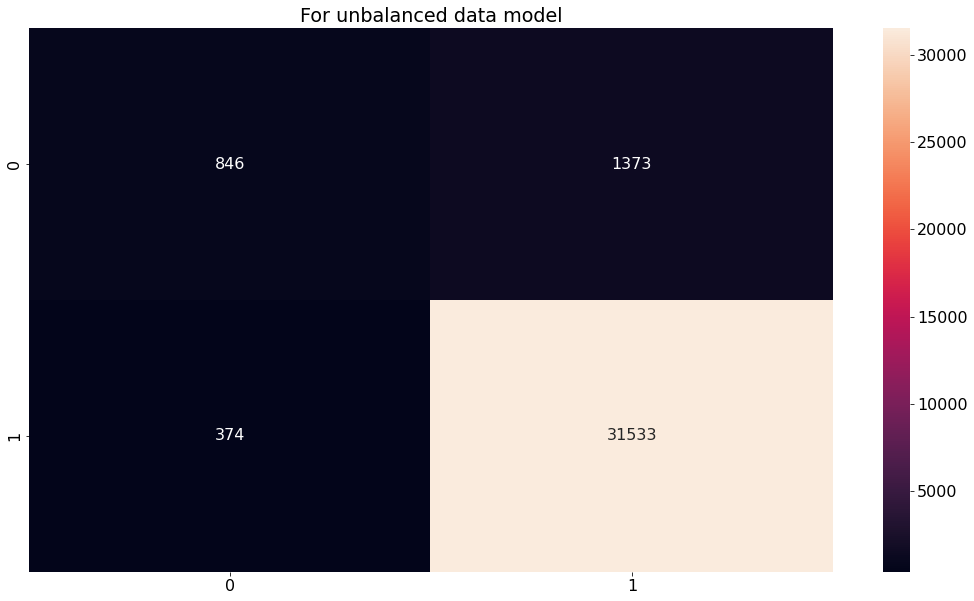

In [165]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_forest_unb),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

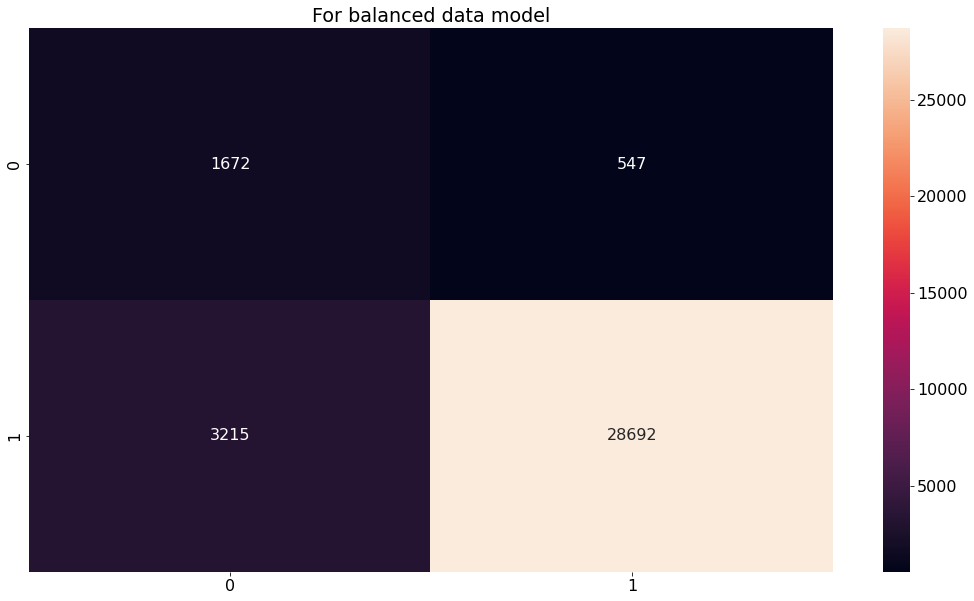

In [166]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_forest_b),annot=True,fmt='d')

In [168]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

randomforest=RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 6, n_estimators= 200) 

for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    randomforest=randomforest.fit(X_train.iloc[train], y_train.iloc[train])

### Comparaison of model on unknown balanced data

In [169]:
y_predict_forest_kf=randomforest.predict(X_valid)
y_predict_forest_b=randomforest_b.predict(X_valid)

print("="*10+"For unbalanced data model with StratiefKfold"+"="*10)
print(classification_report(y_valid,y_predict_forest_kf))

print("=="*10+"For balanced data model"+"=="*10)
print(classification_report(y_valid,y_predict_forest_b))

==========For unbalanced data model with StratiefKfold==========
              precision    recall  f1-score   support

           0       0.69      0.37      0.48      1904
           1       0.96      0.99      0.97     28207

    accuracy                           0.95     30111
   macro avg       0.82      0.68      0.73     30111
weighted avg       0.94      0.95      0.94     30111

====================For balanced data model====================
              precision    recall  f1-score   support

           0       0.34      0.76      0.47      1904
           1       0.98      0.90      0.94     28207

    accuracy                           0.89     30111
   macro avg       0.66      0.83      0.71     30111
weighted avg       0.94      0.89      0.91     30111



<AxesSubplot:title={'center':'For unbalanced data model with StratifiedKFold sampling methods'}>

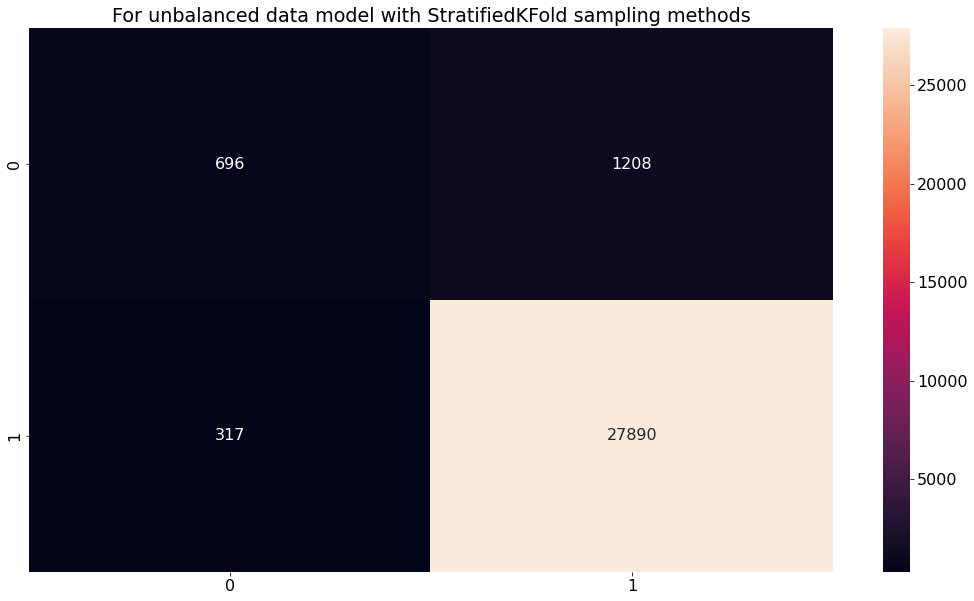

In [170]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid,y_predict_forest_kf),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

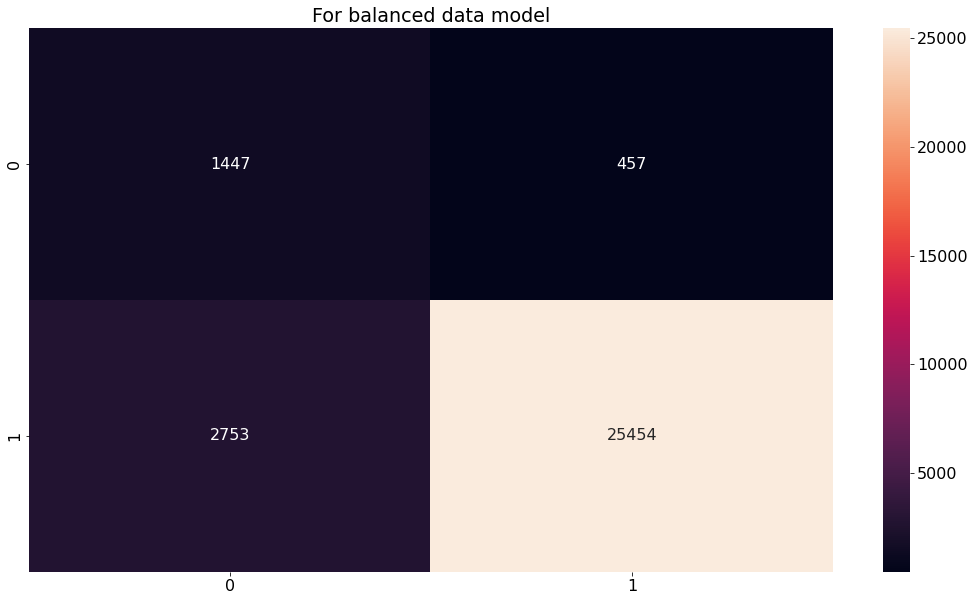

In [171]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid,y_predict_forest_b),annot=True,fmt='d')

### Comparaison of model on unknown unbalanced data

In [114]:
y_predict_forest_kf_unb2=randomforest.predict(X_valid)
y_predict_forest_unb2=randomforest_b.predict(X_valid)

print("=="*10+"For unbalanced data model with StratiefKfold"+"=="*10)
print(classification_report(y_valid,y_predict_forest_kf_unb2))

print("=="*10+"Balanced data model on unbalanced unknown data"+"=="*10)
print(classification_report(y_valid,y_predict_forest_unb2))

====================For unbalanced data model with StratiefKfold====================
              precision    recall  f1-score   support

           0       0.69      0.40      0.50      1952
           1       0.96      0.99      0.97     28159

    accuracy                           0.95     30111
   macro avg       0.82      0.69      0.74     30111
weighted avg       0.94      0.95      0.94     30111

====================Balanced data model on unbalanced unknown data====================
              precision    recall  f1-score   support

           0       0.36      0.78      0.49      1952
           1       0.98      0.90      0.94     28159

    accuracy                           0.89     30111
   macro avg       0.67      0.84      0.71     30111
weighted avg       0.94      0.89      0.91     30111



<AxesSubplot:title={'center':'For unbalanced data model with StratifiedKFold sampling methods'}>

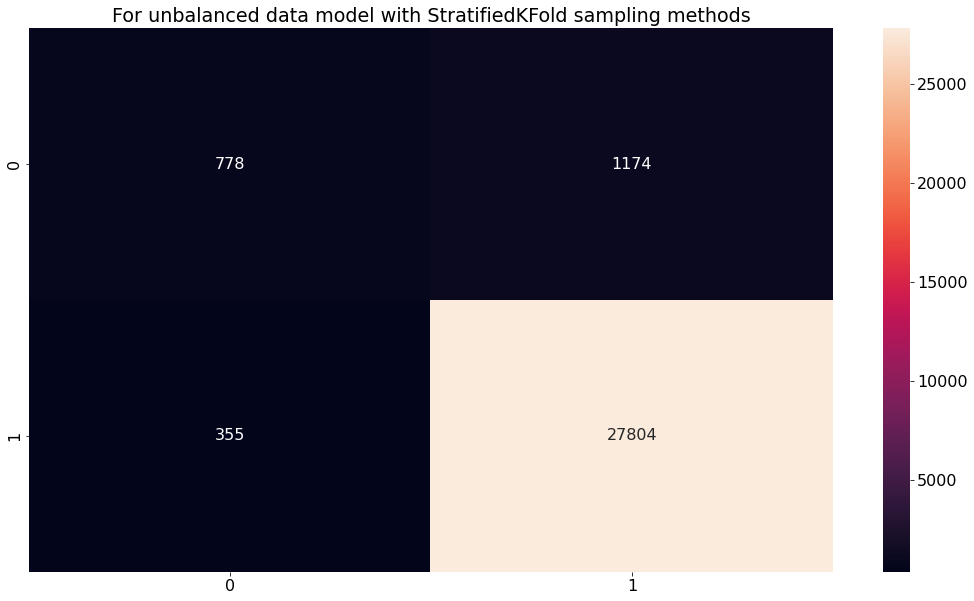

In [115]:
plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid,y_predict_forest_kf_unb2),annot=True,fmt='d')

<AxesSubplot:title={'center':'For balanced data model'}>

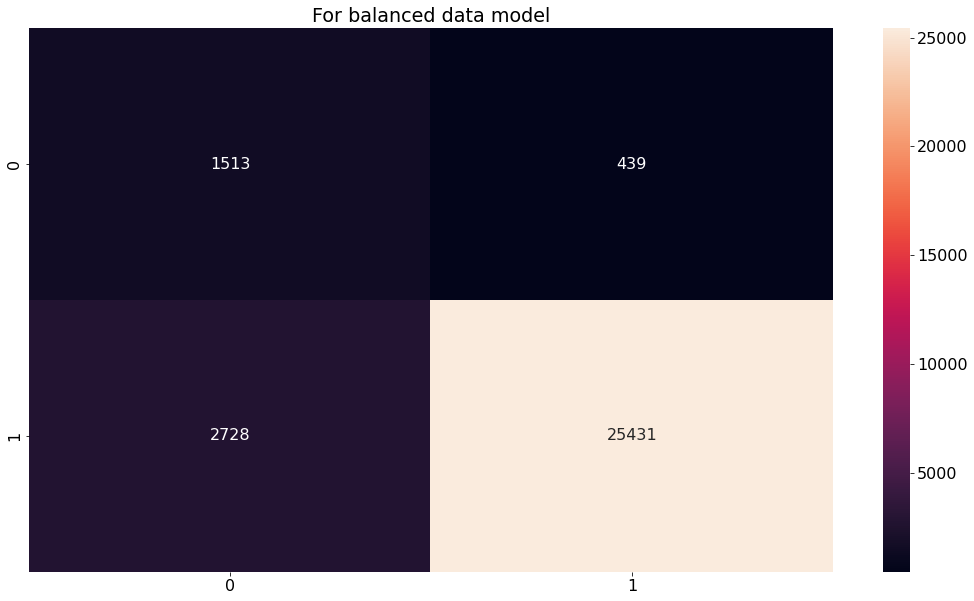

In [116]:
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid,y_predict_forest_unb2),annot=True,fmt='d')

# Recherche des paramètres optimaux pour random forest

estimators_range=[10,100,200]
criter_range=['gini','entropy']
max_depth=[5,10,15]
min_samples_split=range(5,10)
min_samples_leaf=[2,5,10]
max_features=["auto","sqrt"]
boostrap=[True,False]
param_grid={'n_estimators':estimators_range,'criterion':criter_range,'max_depth':max_depth,'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,'max_features':max_features}

optimal_classifier=GridSearchCV(RandomForestClassifier(n_jobs=-1),
                                                 param_grid,
                                                 cv=5,
                                                 verbose=100,
                                                 n_jobs=-1                                              
                             )
optimal_classifier.fit(X_train,y_train)

print("Les hyperparamètres optimaux sont:{} with a score:{:.2f}".format(optimal_classifier.best_params_,optimal_classifier.best_score_))

Les hyperparamètres optimaux sont:{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200} with a score:0.95

https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

# Gradient Boosting Classifier

In [176]:
X_t,X_valid,y_t,y_valid=train_test_split(X,y,train_size=0.85)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,train_size=0.8)

#Pour balanced
X_t_b,X_valid_b,y_t_b,y_valid_b=train_test_split(X_b,y_b,train_size=0.85)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_t_b,y_t_b,train_size=0.8)

In [180]:
gradient_unb=GradientBoostingClassifier().fit(X_train,y_train)
gradient_b=GradientBoostingClassifier().fit(X_train_b,y_train_b)

### Predictions on unbalanced and balanced data with models training on different datasets

====================For unbalanced data====================
              precision    recall  f1-score   support

           0       0.67      0.35      0.46      2206
           1       0.96      0.99      0.97     31920

    accuracy                           0.95     34126
   macro avg       0.81      0.67      0.72     34126
weighted avg       0.94      0.95      0.94     34126

====================For balanced data====================
              precision    recall  f1-score   support

           0       0.33      0.67      0.45      2206
           1       0.98      0.91      0.94     31920

    accuracy                           0.89     34126
   macro avg       0.65      0.79      0.69     34126
weighted avg       0.93      0.89      0.91     34126



<AxesSubplot:title={'center':'For balanced data model'}>

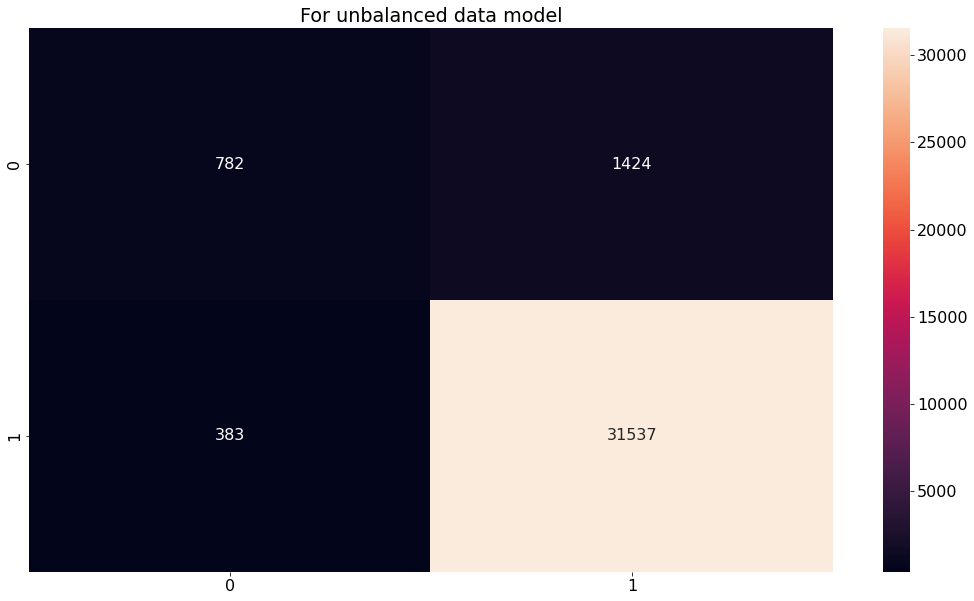

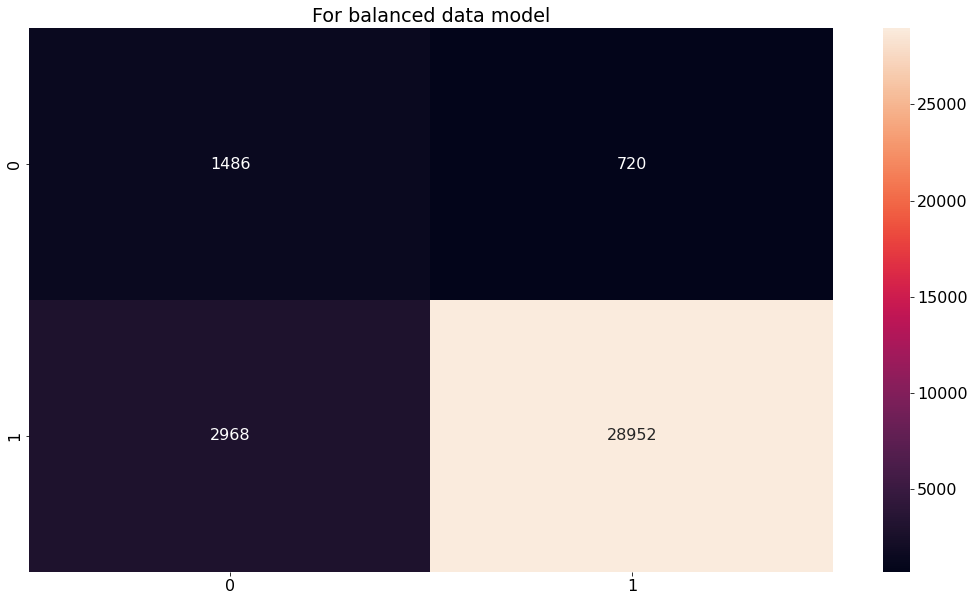

In [181]:
y_predict_gradient_unb=gradient_unb.predict(X_test)
y_predict_gradient_b=gradient_b.predict(X_test)

print("=="*10+"For unbalanced data"+"=="*10)
print(classification_report(y_test,y_predict_gradient_unb))
print("=="*10+"For balanced data"+"=="*10)
print(classification_report(y_test,y_predict_gradient_b))

plt.figure(figsize=(18,10))
plt.title("For unbalanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_gradient_unb),annot=True,fmt='d')

plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_gradient_b),annot=True,fmt='d')

In [158]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

gradient_kfold=GradientBoostingClassifier()    

for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    gradient=gradient_kfold.fit(X_train.iloc[train], y_train.iloc[train])

==========For unbalanced data model with StratiefKfold==========
              precision    recall  f1-score   support

           0       0.67      0.34      0.45      1904
           1       0.96      0.99      0.97     28207

    accuracy                           0.95     30111
   macro avg       0.81      0.66      0.71     30111
weighted avg       0.94      0.95      0.94     30111

====================For balanced data model====================
              precision    recall  f1-score   support

           0       0.33      0.70      0.45      1904
           1       0.98      0.90      0.94     28207

    accuracy                           0.89     30111
   macro avg       0.65      0.80      0.69     30111
weighted avg       0.94      0.89      0.91     30111



<AxesSubplot:title={'center':'For balanced data model'}>

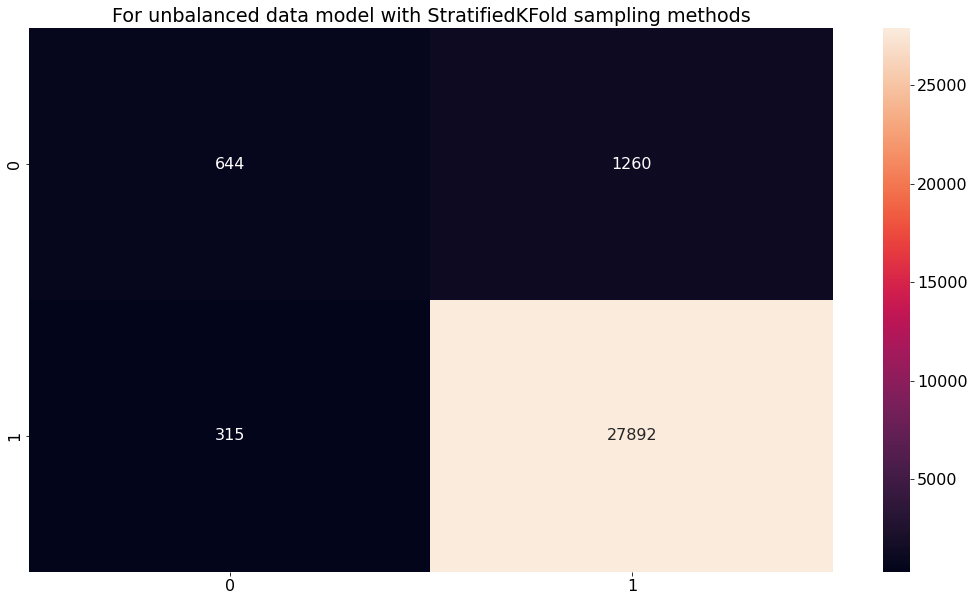

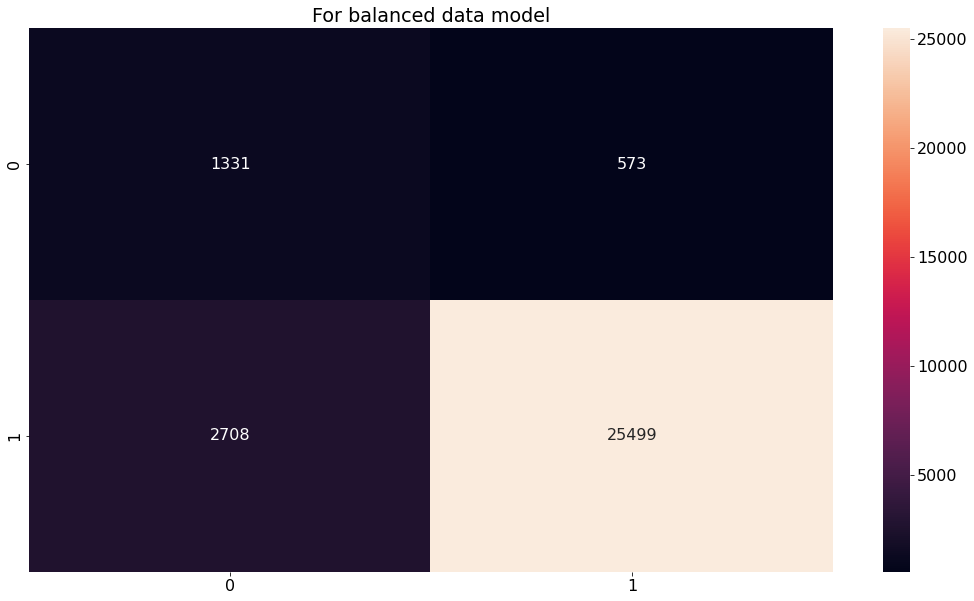

In [160]:
y_predict_gradient_kf=gradient.predict(X_valid)
y_predict_gradient_b=gradient_b.predict(X_valid)

print("="*10+"For unbalanced data model with StratiefKfold"+"="*10)
print(classification_report(y_valid,y_predict_gradient_kf))

print("=="*10+"For balanced data model"+"=="*10)
print(classification_report(y_valid,y_predict_gradient_b))

plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid,y_predict_gradient_kf),annot=True,fmt='d')
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid,y_predict_gradient_b),annot=True,fmt='d')

parametres = {"learning_rate":[0.3,0.2,0.1,0.05,0.01],"max_depth":[2,3,4,5,6],"subsample":[1.0,0.8,0.5]}
#classifieur à utiliser – gradient boosting
gbc = GradientBoostingClassifier()
#instanciation de la recherche
grille = GridSearchCV(estimator=gbc,param_grid=parametres,scoring="accuracy")

grille.fit(X_train,y_train)

print("Les hyperparamètres optimaux sont:{} with a score:{:.2f}".format(grille.best_params_,grille.best_score_))

# - MPLClassifier

In [172]:
X_t,X_valid,y_t,y_valid=train_test_split(X,y,train_size=0.85)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,train_size=0.8)

#Pour balanced
X_t_b,X_valid_b,y_t_b,y_valid_b=train_test_split(X_b,y_b,train_size=0.85)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_t_b,y_t_b,train_size=0.8)

In [138]:
MPLPC_unb=MLPClassifier(max_iter=300).fit(X_train,y_train)
MPLPC_b=MLPClassifier(max_iter=300).fit(X_train_b,y_train_b)

====================For unbalanced data====================
              precision    recall  f1-score   support

           0       0.59      0.12      0.20      2163
           1       0.94      0.99      0.97     31963

    accuracy                           0.94     34126
   macro avg       0.77      0.56      0.58     34126
weighted avg       0.92      0.94      0.92     34126

====================For balanced data====================
              precision    recall  f1-score   support

           0       0.57      0.18      0.28      2163
           1       0.95      0.99      0.97     31963

    accuracy                           0.94     34126
   macro avg       0.76      0.59      0.62     34126
weighted avg       0.92      0.94      0.92     34126



<AxesSubplot:title={'center':'For balanced data model'}>

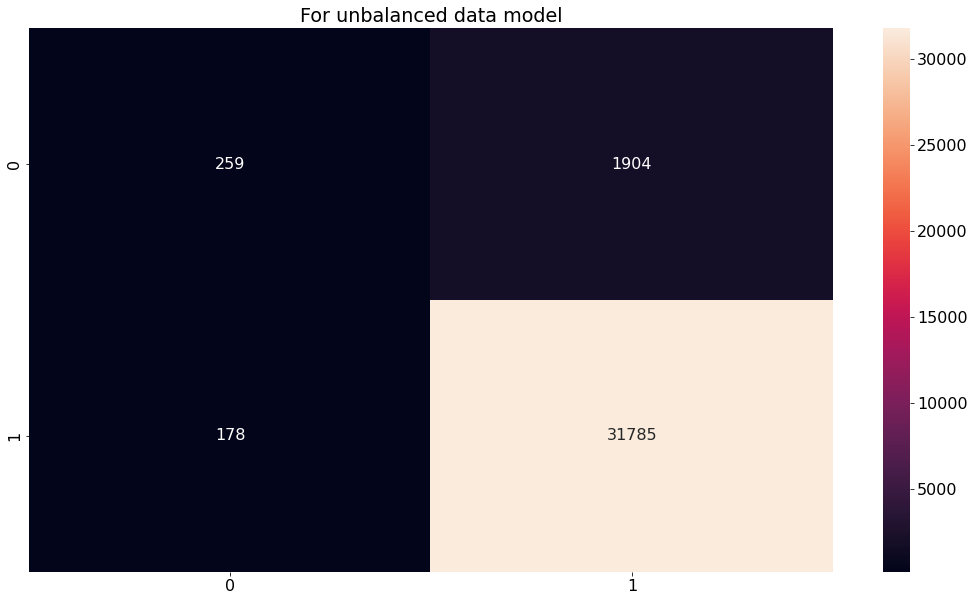

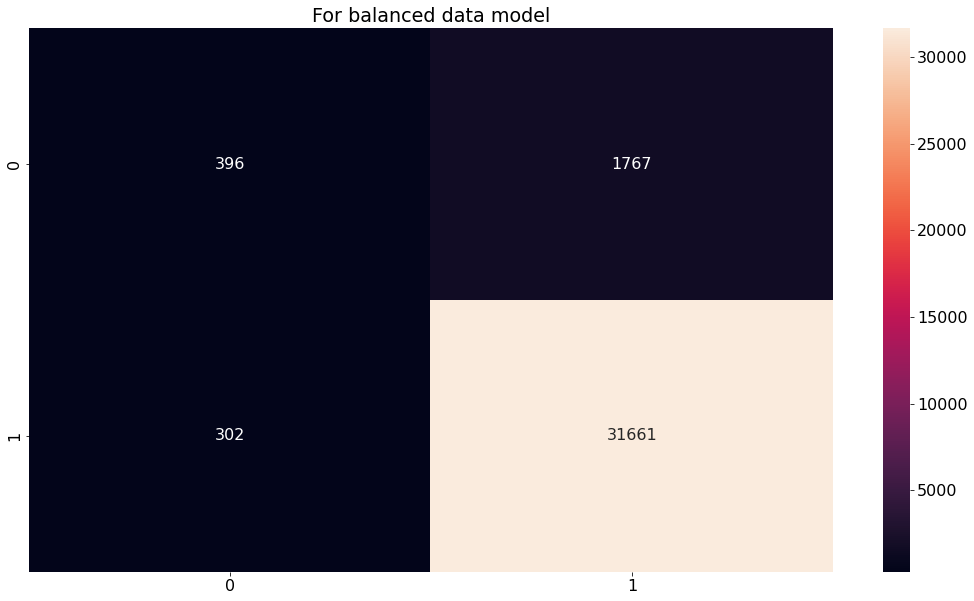

In [151]:
y_predict_MPLPC_unb=MPLPC_unb.predict(X_test)
y_predict_MPLPC_b=MPLPC_b.predict(X_test)

print("=="*10+"For unbalanced data"+"=="*10)
print(classification_report(y_test,y_predict_MPLPC_unb))
print("=="*10+"For balanced data"+"=="*10)
print(classification_report(y_test,y_predict_MPLPC_b))

plt.figure(figsize=(18,10))
plt.title("For unbalanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_MPLPC_unb),annot=True,fmt='d')

plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_MPLPC_b),annot=True,fmt='d')

In [173]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

MPLPC=MLPClassifier(max_iter=300)

for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    MPLPC=MPLPC.fit(X_train.iloc[train], y_train.iloc[train])

==========For unbalanced data model with StratiefKfold==========
              precision    recall  f1-score   support

           0       0.66      0.07      0.13      1840
           1       0.94      1.00      0.97     28271

    accuracy                           0.94     30111
   macro avg       0.80      0.53      0.55     30111
weighted avg       0.93      0.94      0.92     30111

====================For balanced data model====================
              precision    recall  f1-score   support

           0       0.54      0.18      0.27      1840
           1       0.95      0.99      0.97     28271

    accuracy                           0.94     30111
   macro avg       0.75      0.58      0.62     30111
weighted avg       0.92      0.94      0.93     30111



<AxesSubplot:title={'center':'For balanced data model'}>

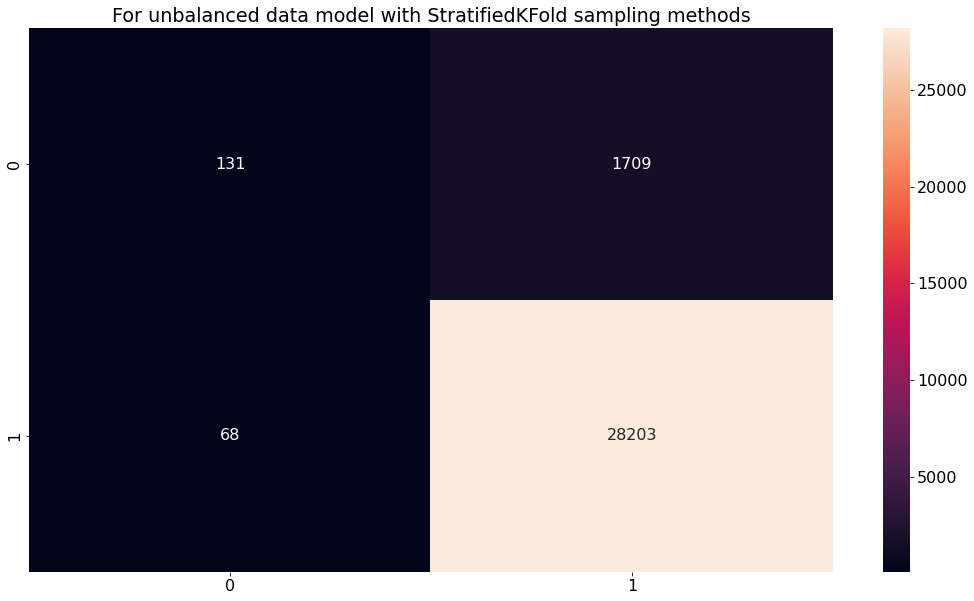

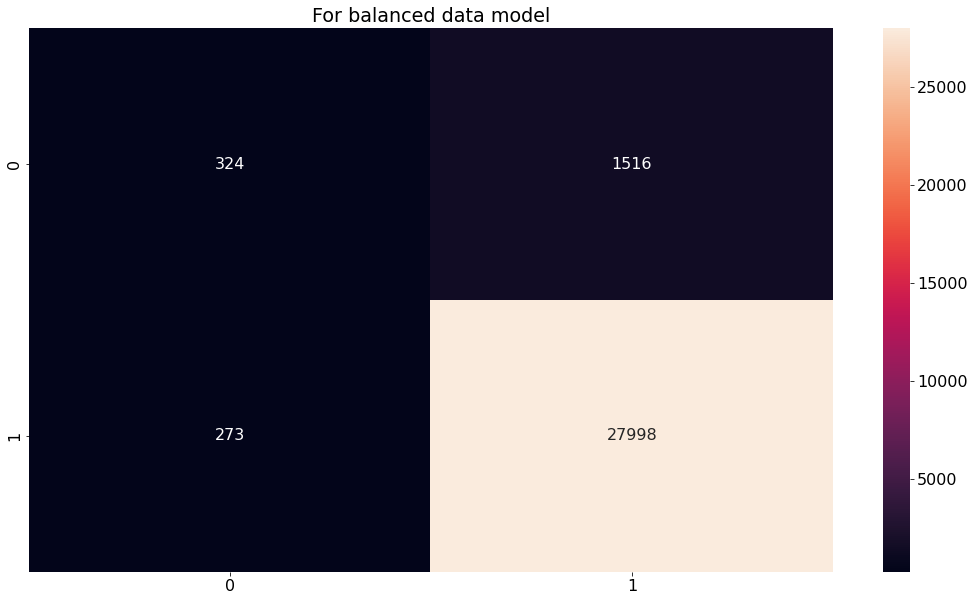

In [175]:
y_predict_MPLPC_kf=MPLPC.predict(X_valid)
y_predict_MPLPC_b=MPLPC_b.predict(X_valid)

print("="*10+"For unbalanced data model with StratiefKfold"+"="*10)
print(classification_report(y_valid,y_predict_MPLPC_kf))

print("=="*10+"For balanced data model"+"=="*10)
print(classification_report(y_valid,y_predict_MPLPC_b))

plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid,y_predict_MPLPC_kf),annot=True,fmt='d')
plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid,y_predict_MPLPC_b),annot=True,fmt='d')

# LDA

In [144]:
X_t,X_valid,y_t,y_valid=train_test_split(X,y,train_size=0.85)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,train_size=0.8)

#Pour balanced
X_t_b,X_valid_b,y_t_b,y_valid_b=train_test_split(X_b,y_b,train_size=0.85)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_t_b,y_t_b,train_size=0.8)

In [145]:
#Train the model using the training sets
lda_unb=LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_b=LinearDiscriminantAnalysis().fit(X_train_b,y_train_b)

====================For unbalanced data====================
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      2163
           1       0.97      0.97      0.97     31963

    accuracy                           0.94     34126
   macro avg       0.75      0.73      0.74     34126
weighted avg       0.94      0.94      0.94     34126

====================For balanced data====================
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      2163
           1       0.97      0.96      0.97     31963

    accuracy                           0.94     34126
   macro avg       0.73      0.75      0.74     34126
weighted avg       0.94      0.94      0.94     34126



<AxesSubplot:title={'center':'For balanced data model'}>

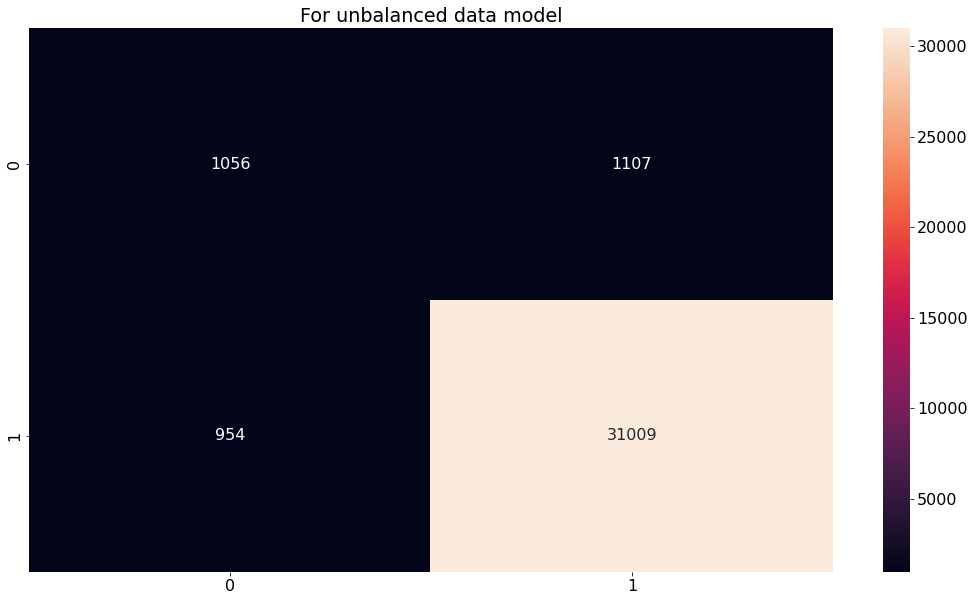

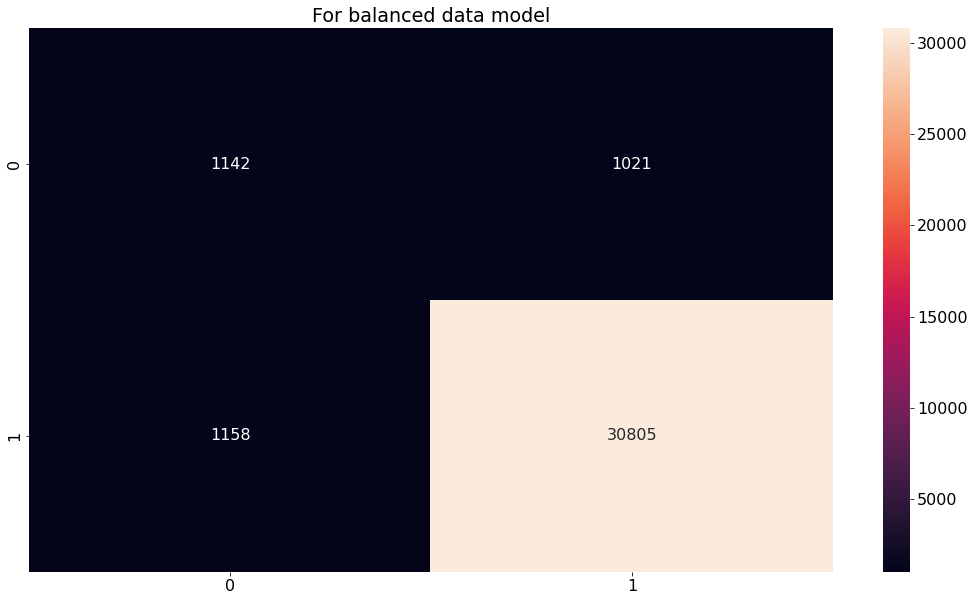

In [146]:
y_predict_lda_unb=lda_unb.predict(X_test)
y_predict_lda_b=lda_b.predict(X_test)

print("=="*10+"For unbalanced data"+"=="*10)
print(classification_report(y_test,y_predict_lda_unb))
print("=="*10+"For balanced data"+"=="*10)
print(classification_report(y_test,y_predict_lda_b))

plt.figure(figsize=(18,10))
plt.title("For unbalanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_lda_unb),annot=True,fmt='d')

plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_test,y_predict_lda_b),annot=True,fmt='d')

In [148]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

for (train, test), i in zip(cv.split(X_train, y_train), range(5)):
    lda=LinearDiscriminantAnalysis().fit(X_train.iloc[train], y_train.iloc[train])

==========For unbalanced data model with StratiefKfold==========
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1914
           1       0.96      0.97      0.97     28197

    accuracy                           0.94     30111
   macro avg       0.74      0.72      0.73     30111
weighted avg       0.94      0.94      0.94     30111

====================For balanced data model====================
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1914
           1       0.97      0.96      0.97     28197

    accuracy                           0.93     30111
   macro avg       0.73      0.74      0.73     30111
weighted avg       0.94      0.93      0.94     30111



<AxesSubplot:title={'center':'For balanced data model'}>

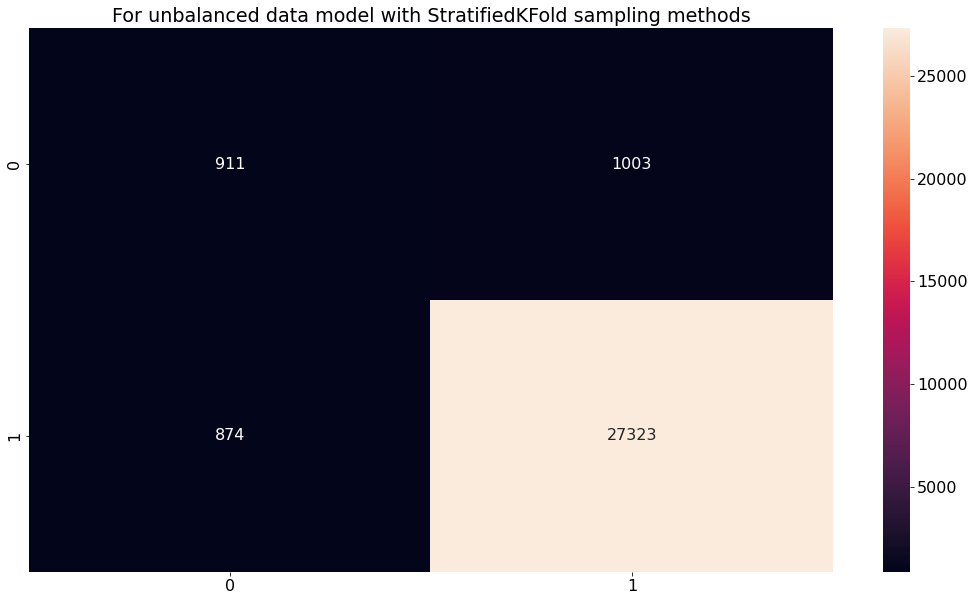

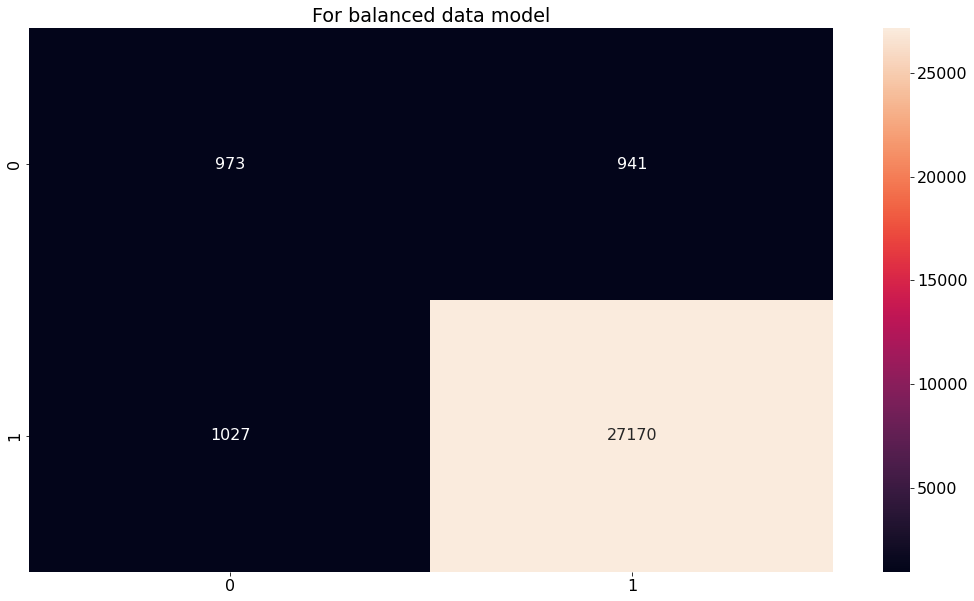

In [150]:
y_predict_lda_kf=lda.predict(X_valid)
y_predict_lda_b=lda_b.predict(X_valid)

print("="*10+"For unbalanced data model with StratiefKfold"+"="*10)
print(classification_report(y_valid,y_predict_lda_kf))

print("=="*10+"For balanced data model"+"=="*10)
print(classification_report(y_valid,y_predict_lda_b))

plt.figure(figsize=(18,10))
plt.title("For unbalanced data model with StratifiedKFold sampling methods")
sns.heatmap(confusion_matrix(y_valid,y_predict_lda_kf),annot=True,fmt='d')

plt.figure(figsize=(18,10))
plt.title("For balanced data model")
sns.heatmap(confusion_matrix(y_valid,y_predict_lda_b),annot=True,fmt='d')